## Activity Exploration
This notebook designs a clean dataset for activity variables and analyzes their effects on dementia.

In [1]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import pylab as pl
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [2]:
dta = pd.read_csv('data/clean_data.csv')
dta_dummy = pd.read_csv('data/dummy_data.csv')
dta.head(5)

,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Marital_status,Income,Occupation_class,...,Vegetable,Vegetable_category,Fruit,Fruit_category,Salted_fish,Salted_fish_category,Instant_noodle,Instant_noodle_category,Tempe,Tempe_category
0,80001,Dementia,70.0,60-74,3.0,0-6 years,Female,Married,No Income,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
1,80002,Normal,63.0,60-74,0.0,0-6 years,Female,Single,< monthly minimum wage,profesional,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
2,80003,Normal,64.0,60-74,6.0,0-6 years,Female,Married,No Income,housewife,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
3,80004,Normal,62.0,60-74,6.0,0-6 years,Female,Married,≥ monthly minimum wage,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent
4,80005,Dementia,78.0,>75,3.0,0-6 years,Female,Married,No Income,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent


## Create Dummy Variables for Intellectual Activity Categories

In [3]:
def Reads(row):
    if row['Intellectual_1'] == 'Yes' :
      return 1
    return 0

In [4]:
dta['Reads'] = dta.apply (lambda row: Reads(row), axis=1)

In [5]:
def Surfs_Internet(row):
    if row['Intellectual_2'] == 'Yes' :
      return 1
    return 0

In [6]:
dta['Surfs_Internet'] = dta.apply (lambda row: Surfs_Internet(row), axis=1)

In [7]:
def Plays_Games(row):
    if row['Intellectual_3'] == 'Yes' :
      return 1
    return 0

In [8]:
dta['Plays_Games'] = dta.apply (lambda row: Plays_Games(row), axis=1)

In [9]:
def Invests(row):
    if row['Intellectual_4'] == 'Yes' :
      return 1
    return 0

In [10]:
dta['Invests'] = dta.apply (lambda row: Invests(row), axis=1)

In [11]:
def Discusses(row):
    if row['Intellectual_5'] == 'Yes' :
      return 1
    return 0

In [12]:
dta['Discusses'] = dta.apply (lambda row: Discusses(row), axis=1)

In [13]:
def Writes_Paints(row):
    if row['Intellectual_6'] == 'Yes' :
      return 1
    return 0

In [14]:
dta['Writes_Paints'] = dta.apply (lambda row: Writes_Paints(row), axis=1)

In [15]:
def Plays_Instrument(row):
    if row['Intellectual_7'] == 'Yes' :
      return 1
    return 0

In [16]:
dta['Plays_Instrument'] = dta.apply (lambda row: Plays_Instrument(row), axis=1)

In [17]:
def Intellect_Other(row):
    if row['Intellectual_7'] == 'Yes' :
      return 1
    return 0

In [18]:
dta['Intellect_Other'] = dta.apply (lambda row: Intellect_Other(row), axis=1)

## Create Dummy Variables for Social Activity Categories

In [19]:
def Attends_Class(row):
    if row['Social_1'] == 'Yes' :
      return 1
    return 0

In [20]:
dta['Attends_Class'] = dta.apply (lambda row: Attends_Class(row), axis=1)

In [21]:
def Joins_Center(row):
    if row['Social_2'] == 'Yes' :
      return 1
    return 0

In [22]:
dta['Joins_Center'] = dta.apply (lambda row: Joins_Center(row), axis=1)

In [23]:
def Volunteers(row):
    if row['Social_3'] == 'Yes' :
      return 1
    return 0

In [24]:
dta['Volunteers'] = dta.apply (lambda row: Volunteers(row), axis=1)

In [25]:
def Watches_Entertainment(row):
    if row['Social_4'] == 'Yes' :
      return 1
    return 0

In [26]:
dta['Watches_Entertainment'] = dta.apply (lambda row: Watches_Entertainment(row), axis=1)

In [27]:
def Meets_People(row):
    if row['Social_5'] == 'Yes' :
      return 1
    return 0

In [28]:
dta['Meets_People'] = dta.apply (lambda row: Meets_People(row), axis=1)

In [29]:
def Sees_Dramas(row):
    if row['Social_6'] == 'Yes' :
      return 1
    return 0

In [30]:
dta['Sees_Dramas'] = dta.apply (lambda row: Sees_Dramas(row), axis=1)

In [31]:
def Sings(row):
    if row['Social_7'] == 'Yes' :
      return 1
    return 0

In [32]:
dta['Sings'] = dta.apply (lambda row: Sings(row), axis=1)

In [33]:
def Attends_Religion(row):
    if row['Social_8'] == 'Yes' :
      return 1
    return 0

In [34]:
dta['Attends_Religion'] = dta.apply (lambda row: Attends_Religion(row), axis=1)

In [35]:
def Social_Other(row):
    if row['Social_9'] == 'Yes' :
      return 1
    return 0

In [36]:
dta['Social_Other'] = dta.apply (lambda row: Social_Other(row), axis=1)

## Create Dummy Variables for Recreational Activity Categories

In [37]:
def Watches_TV(row):
    if row['Recreational_1'] == 'Yes' :
      return 1
    return 0

In [38]:
dta['Watches_TV'] = dta.apply (lambda row: Watches_TV(row), axis=1)

In [39]:
def Listens_Music(row):
    if row['Recreational_2'] == 'Yes' :
      return 1
    return 0

In [40]:
dta['Listens_Music'] = dta.apply (lambda row: Listens_Music(row), axis=1)

In [41]:
def Shops(row):
    if row['Recreational_3'] == 'Yes' :
      return 1
    return 0

In [42]:
dta['Shops'] = dta.apply (lambda row: Shops(row), axis=1)

In [43]:
def Cooks(row):
    if row['Recreational_4'] == 'Yes' :
      return 1
    return 0

In [44]:
dta['Cooks'] = dta.apply (lambda row: Cooks(row), axis=1)

In [45]:
def Fishes(row):
    if row['Recreational_5'] == 'Yes' :
      return 1
    return 0

In [46]:
dta['Fishes'] = dta.apply (lambda row: Fishes(row), axis=1)

In [47]:
def Has_Pets(row):
    if row['Recreational_6'] == 'Yes' :
      return 1
    return 0

In [48]:
dta['Has_Pets'] = dta.apply (lambda row: Has_Pets(row), axis=1)

In [49]:
def Gets_Massages(row):
    if row['Recreational_7'] == 'Yes' :
      return 1
    return 0

In [50]:
dta['Gets_Massages'] = dta.apply (lambda row: Gets_Massages(row), axis=1)

In [51]:
def Recreation_Other(row):
    if row['Recreational_8'] == 'Yes' :
      return 1
    return 0

In [52]:
dta['Recreation_Other'] = dta.apply (lambda row: Recreation_Other(row), axis=1)

## Create Dummy Variables for Physical Activity Categories

In [53]:
def Does_Yoga(row):
    if row['Physical_1'] == 'Yes' :
      return 1
    return 0

In [54]:
dta['Does_Yoga'] = dta.apply (lambda row: Does_Yoga(row), axis=1)

In [55]:
def Light_Aerobic(row):
    if row['Physical_2'] == 'Yes' :
      return 1
    return 0

In [56]:
dta['Light_Aerobic'] = dta.apply (lambda row: Light_Aerobic(row), axis=1)

In [57]:
def Strenuous_Aerobic(row):
    if row['Physical_3'] == 'Yes' :
      return 1
    return 0

In [58]:
dta['Strenuous_Aerobic'] = dta.apply (lambda row: Strenuous_Aerobic(row), axis=1)

In [59]:
def Stretches_Tones(row):
    if row['Physical_4'] == 'Yes' :
      return 1
    return 0

In [60]:
dta['Stretches_Tones'] = dta.apply (lambda row: Stretches_Tones(row), axis=1)

In [61]:
def Physical_Other(row):
    if row['Physical_5'] == 'Yes' :
      return 1
    return 0

In [62]:
dta['Physical_Other'] = dta.apply (lambda row: Physical_Other(row), axis=1)

In [63]:
cat_dummies = pd.get_dummies(dta.Category)
dta = pd.concat([dta.drop(['Category'],axis=1),cat_dummies],axis=1)
dta.head()

,Participant_ID,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Marital_status,Income,Occupation_class,Living_area,...,Has_Pets,Gets_Massages,Recreation_Other,Does_Yoga,Light_Aerobic,Strenuous_Aerobic,Stretches_Tones,Physical_Other,Dementia,Normal
0,80001,70.0,60-74,3.0,0-6 years,Female,Married,No Income,housewife,Rural,...,0,0,0,0,0,0,0,0,1,0
1,80002,63.0,60-74,0.0,0-6 years,Female,Single,< monthly minimum wage,profesional,Rural,...,1,0,0,0,0,1,1,0,0,1
2,80003,64.0,60-74,6.0,0-6 years,Female,Married,No Income,housewife,Rural,...,1,1,0,0,0,0,1,0,0,1
3,80004,62.0,60-74,6.0,0-6 years,Female,Married,≥ monthly minimum wage,housewife,Rural,...,0,0,0,0,1,0,1,0,0,1
4,80005,78.0,>75,3.0,0-6 years,Female,Married,No Income,housewife,Rural,...,1,0,0,0,0,0,0,0,1,0


In [64]:
dta_activity = dta[['Participant_ID', 'Dementia', 'Age_yrs', 'Education_yrs', 
                    'Reads', 'Surfs_Internet', 'Plays_Games', 'Invests', 'Discusses',
                    'Writes_Paints', 'Plays_Instrument', 'Intellect_Other',
                    'Attends_Class', 'Joins_Center', 'Volunteers', 'Watches_Entertainment',
                    'Meets_People', 'Sees_Dramas', 'Sings', 'Attends_Religion', 'Social_Other',
                    'Watches_TV', 'Listens_Music', 'Shops', 'Cooks', 'Fishes', 'Has_Pets',
                    'Gets_Massages', 'Recreation_Other', 'Does_Yoga', 'Strenuous_Aerobic', 
                    'Light_Aerobic', 'Strenuous_Aerobic', 'Stretches_Tones', 'Physical_Other']]

In [65]:
dta_activity

,Participant_ID,Dementia,Age_yrs,Education_yrs,Reads,Surfs_Internet,Plays_Games,Invests,Discusses,Writes_Paints,...,Fishes,Has_Pets,Gets_Massages,Recreation_Other,Does_Yoga,Strenuous_Aerobic,Light_Aerobic,Strenuous_Aerobic,Stretches_Tones,Physical_Other
0,80001,1,70.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80002,0,63.0,0.0,1,0,0,0,0,1,...,1,1,0,0,0,1,0,1,1,0
2,80003,0,64.0,6.0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,80004,0,62.0,6.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,80005,1,78.0,3.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,80734,0,61.0,8.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
682,80735,0,66.0,6.0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
683,80736,0,60.0,6.0,1,0,0,0,1,1,...,0,1,1,0,0,0,0,0,1,0
684,80737,0,60.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
dta_activity.to_csv(r'data/activity_data.csv', index = False)

In [67]:
dta_activity.dtypes

Participant_ID             int64
Dementia                   uint8
Age_yrs                  float64
Education_yrs            float64
Reads                      int64
Surfs_Internet             int64
Plays_Games                int64
Invests                    int64
Discusses                  int64
Writes_Paints              int64
Plays_Instrument           int64
Intellect_Other            int64
Attends_Class              int64
Joins_Center               int64
Volunteers                 int64
Watches_Entertainment      int64
Meets_People               int64
Sees_Dramas                int64
Sings                      int64
Attends_Religion           int64
Social_Other               int64
Watches_TV                 int64
Listens_Music              int64
Shops                      int64
Cooks                      int64
Fishes                     int64
Has_Pets                   int64
Gets_Massages              int64
Recreation_Other           int64
Does_Yoga                  int64
Strenuous_

## MODELS

In [68]:
dta_activity['Activity_sum']= dta_activity.iloc[:, -31:-1].sum(axis=1)

Text(0.5, 0.98, 'Distribution of Activity Totals for Individuals without (0) and with (1) Dementia')

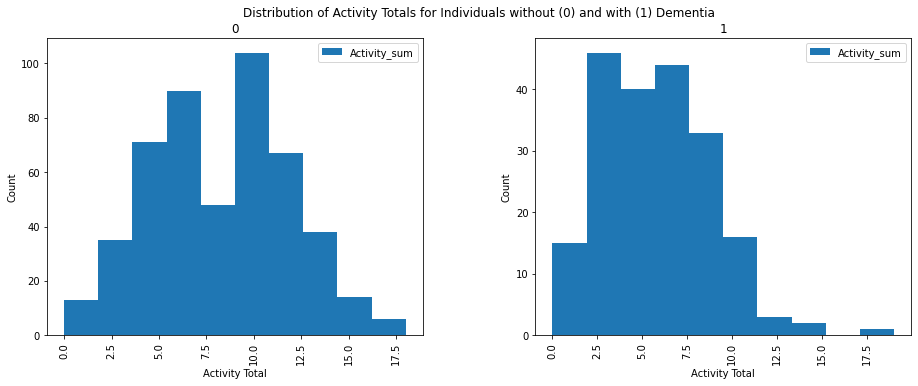

In [69]:
dta_activity = dta_activity.hist(column='Activity_sum', 
                               by='Dementia', 
                               figsize=(15, 5.5),
                               legend=True)
for total in dta_activity.flatten():
    total.set_xlabel("Activity Total")
    total.set_ylabel("Count")
pl.suptitle('Distribution of Activity Totals for Individuals without (0) and with (1) Dementia')

In [70]:
miss.matrix(dta_activity)

IndexError: tuple index out of range

In [ ]:
dta1 = dta_activity.dropna()
len(dta1)

In [ ]:
sample = dta1.groupby("Dementia").sample(n=191, random_state=1988)
sample.columns

In [ ]:
y = sample['Dementia']
X = sample[['Reads', 'Surfs_Internet', 'Plays_Games', 'Invests', 'Discusses',
                    'Writes_Paints', 'Plays_Instrument', 'Intellect_Other',
                    'Attends_Class', 'Joins_Center', 'Volunteers', 'Watches_Entertainment',
                    'Meets_People', 'Sees_Dramas', 'Sings', 'Attends_Religion', 'Social_Other',
                    'Watches_TV', 'Listens_Music', 'Shops', 'Cooks', 'Fishes', 'Has_Pets',
                    'Gets_Massages', 'Recreation_Other', 'Does_Yoga', 'Strenuous_Aerobic', 
                    'Light_Aerobic', 'Strenuous_Aerobic', 'Stretches_Tones', 'Physical_Other']]
X.columns

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1988)

In [ ]:
# Look at the training data
train_X.shape 

In [ ]:
(
    ggplot(train_X.melt(),aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

In [ ]:
D = train_X.copy()
D['Dementia'] = train_y

(
    ggplot(D.melt(id_vars=["Dementia"]),
           aes(x="value",y="Dementia"))+
    geom_point(alpha=.5) +
    facet_wrap("variable",scales="free") +
    geom_smooth(method="lm",se=False,color="red") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
)

In [ ]:
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [ ]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

In [ ]:
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

In [ ]:
use_metrics = ["neg_mean_squared_error"]

In [ ]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [ ]:
lm_scores

In [ ]:
# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores

In [ ]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    coord_flip() +
    theme_minimal() +
    theme(dpi=150)
)

In [ ]:
set_k = dict()
for k in [1,5,10,50,100,250]:
    score = cross_validate(KNN(n_neighbors=k),
                           train_X,train_y, 
                           cv = fold_generator, 
                           scoring =use_metrics)
    s = score['test_neg_mean_squared_error']
    set_k[k] = s.mean()
 
set_k

In [ ]:
# (0) Split the data 
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1988)

# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=1988)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), 
                    ['Reads', 'Surfs_Internet', 'Plays_Games', 'Invests', 'Discusses',
       'Writes_Paints', 'Plays_Instrument', 'Intellect_Other', 'Attends_Class',
       'Joins_Center', 'Volunteers', 'Watches_Entertainment', 'Meets_People',
       'Sees_Dramas', 'Sings', 'Attends_Religion', 'Social_Other',
       'Watches_TV', 'Listens_Music', 'Shops', 'Cooks', 'Fishes', 'Has_Pets',
       'Gets_Massages', 'Recreation_Other', 'Does_Yoga', 'Strenuous_Aerobic',
       'Strenuous_Aerobic', 'Light_Aerobic', 'Strenuous_Aerobic',
       'Strenuous_Aerobic', 'Stretches_Tones', 'Physical_Other'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

In [ ]:
# (6) Fit the model to the training data
search.fit(train_X,train_y.values.ravel())

In [ ]:
search.best_score_ # Mean out-of-sample (CV) error

In [ ]:
search.best_params_

In [ ]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)

In [ ]:
m.mean_squared_error(test_y,pred_y)

In [ ]:
m.r2_score(test_y,pred_y)